In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_excel("wine.xlsx")

In [3]:
wine = wine.sort_index()

In [4]:
wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.isna().sum()

class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [6]:
print(wine.shape)

(178, 14)


In [7]:
print(wine['class'].unique())

[1 2 3]


In [8]:
print(wine.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


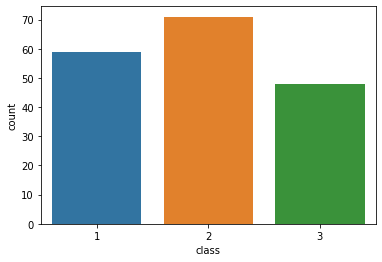

In [9]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(wine['class'],label="Count")
plt.show()

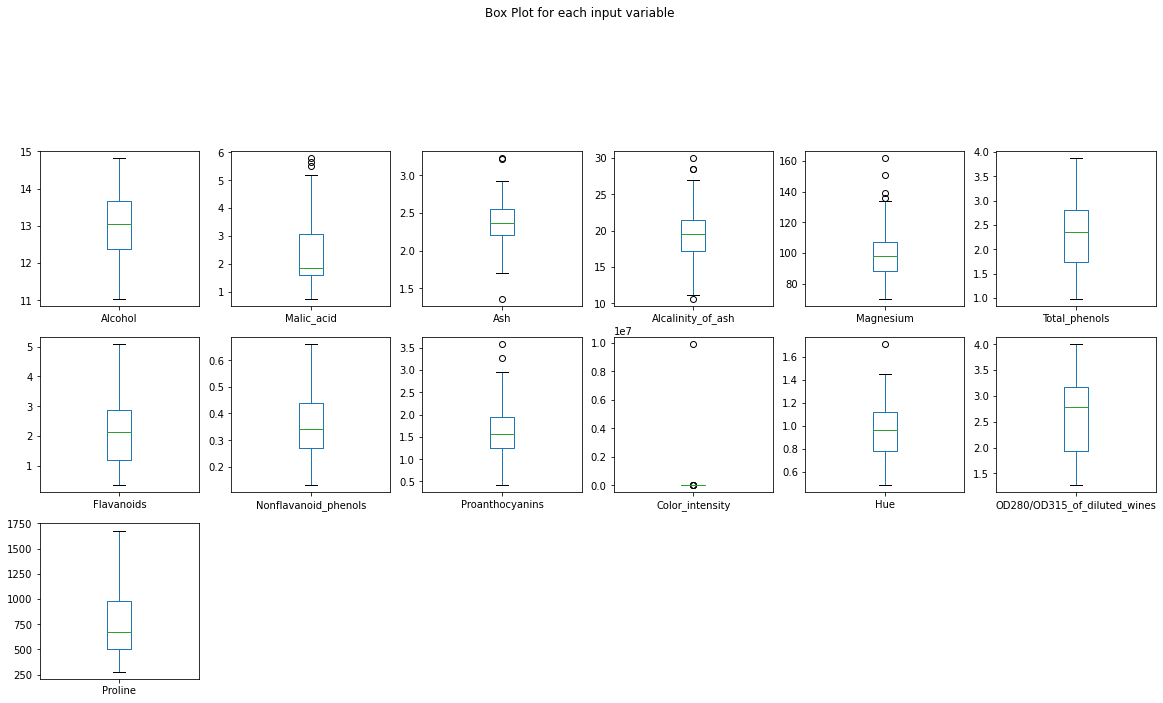

In [10]:
wine.drop('class', axis=1).plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Box Plot for each input variable')
plt.savefig('class_box')
plt.show()

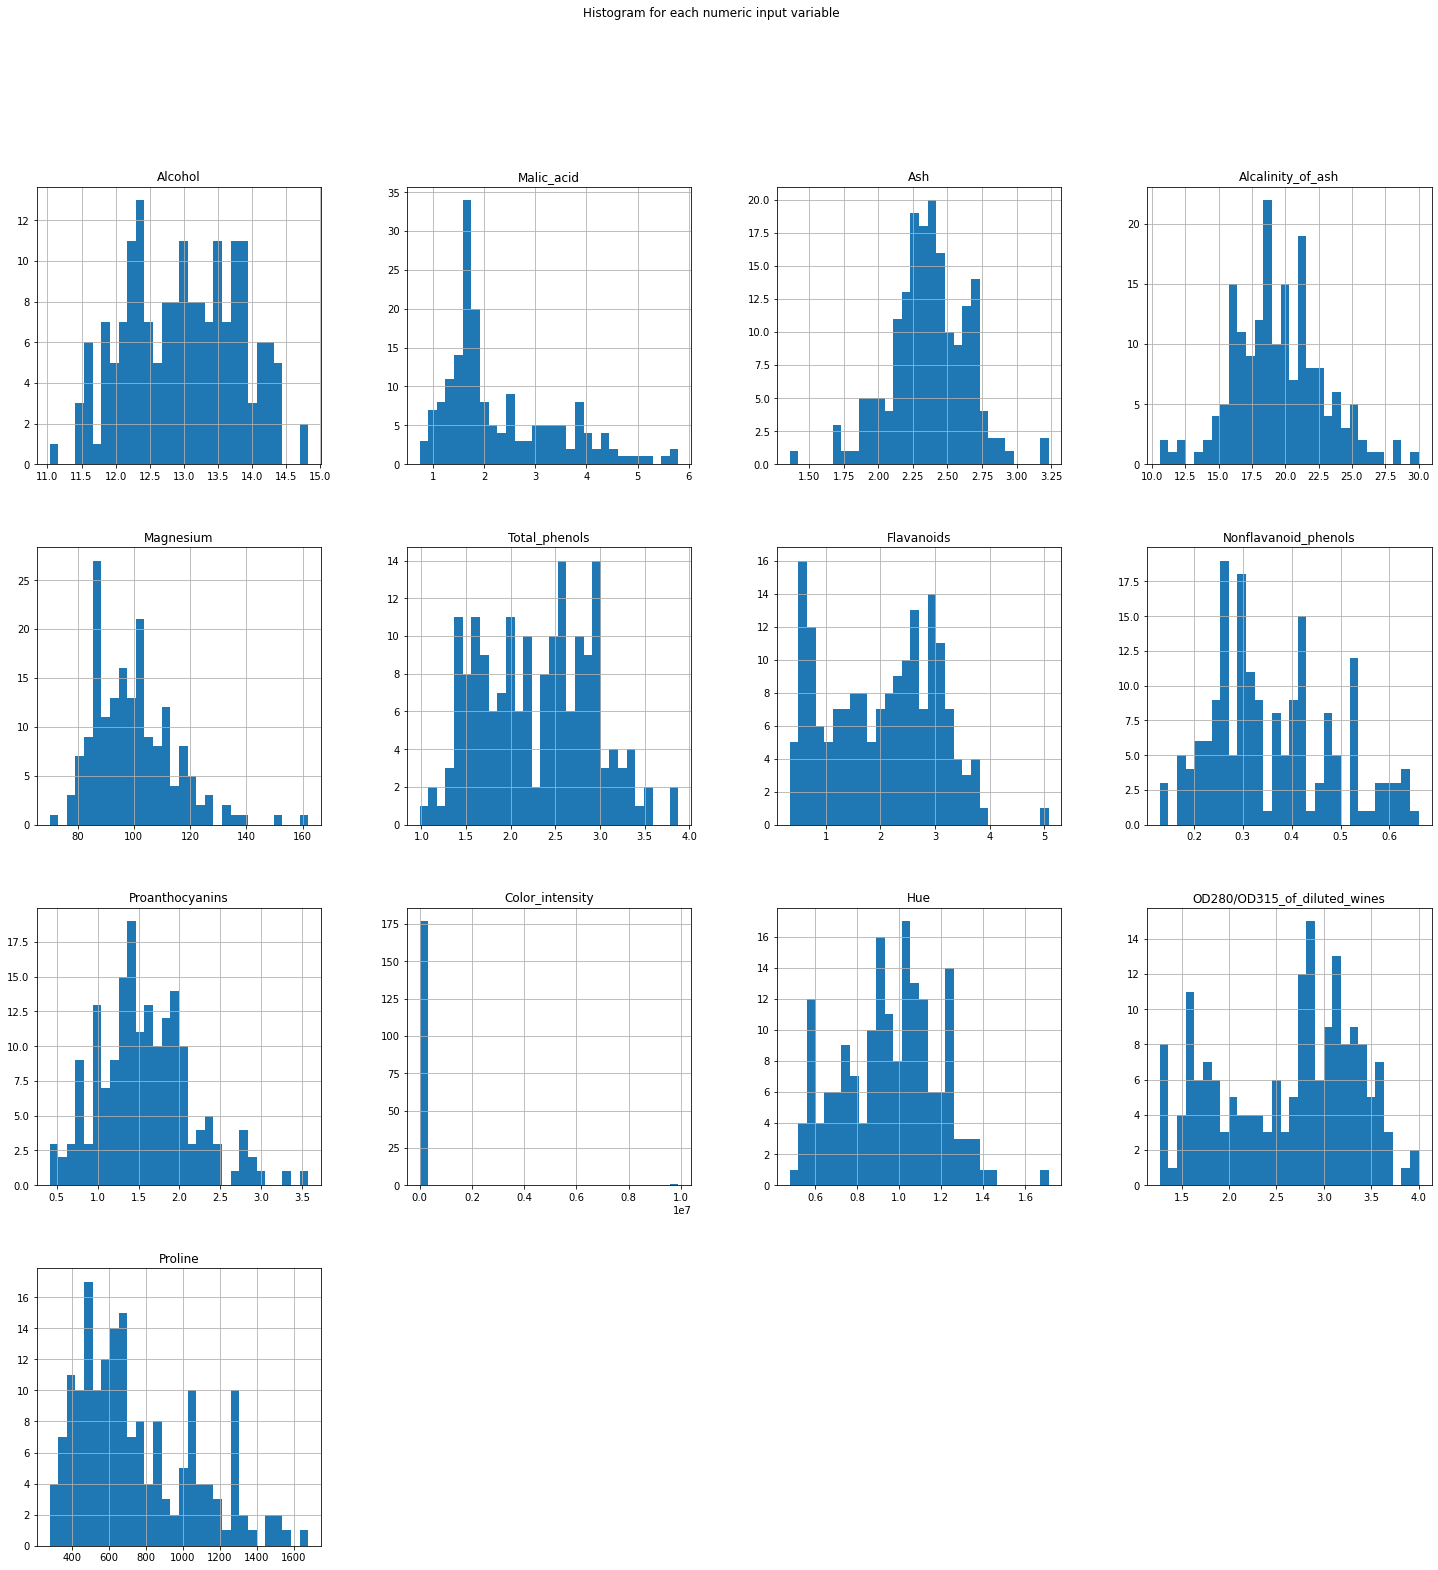

In [11]:
import pylab as pl
wine.drop('class' ,axis=1).hist(bins=30, figsize=(25,25))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('class_hist')
plt.show()

In [12]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

In [13]:
feature_names = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash','Magnesium',
                'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                 'Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
X = wine[feature_names]
y = wine['class']

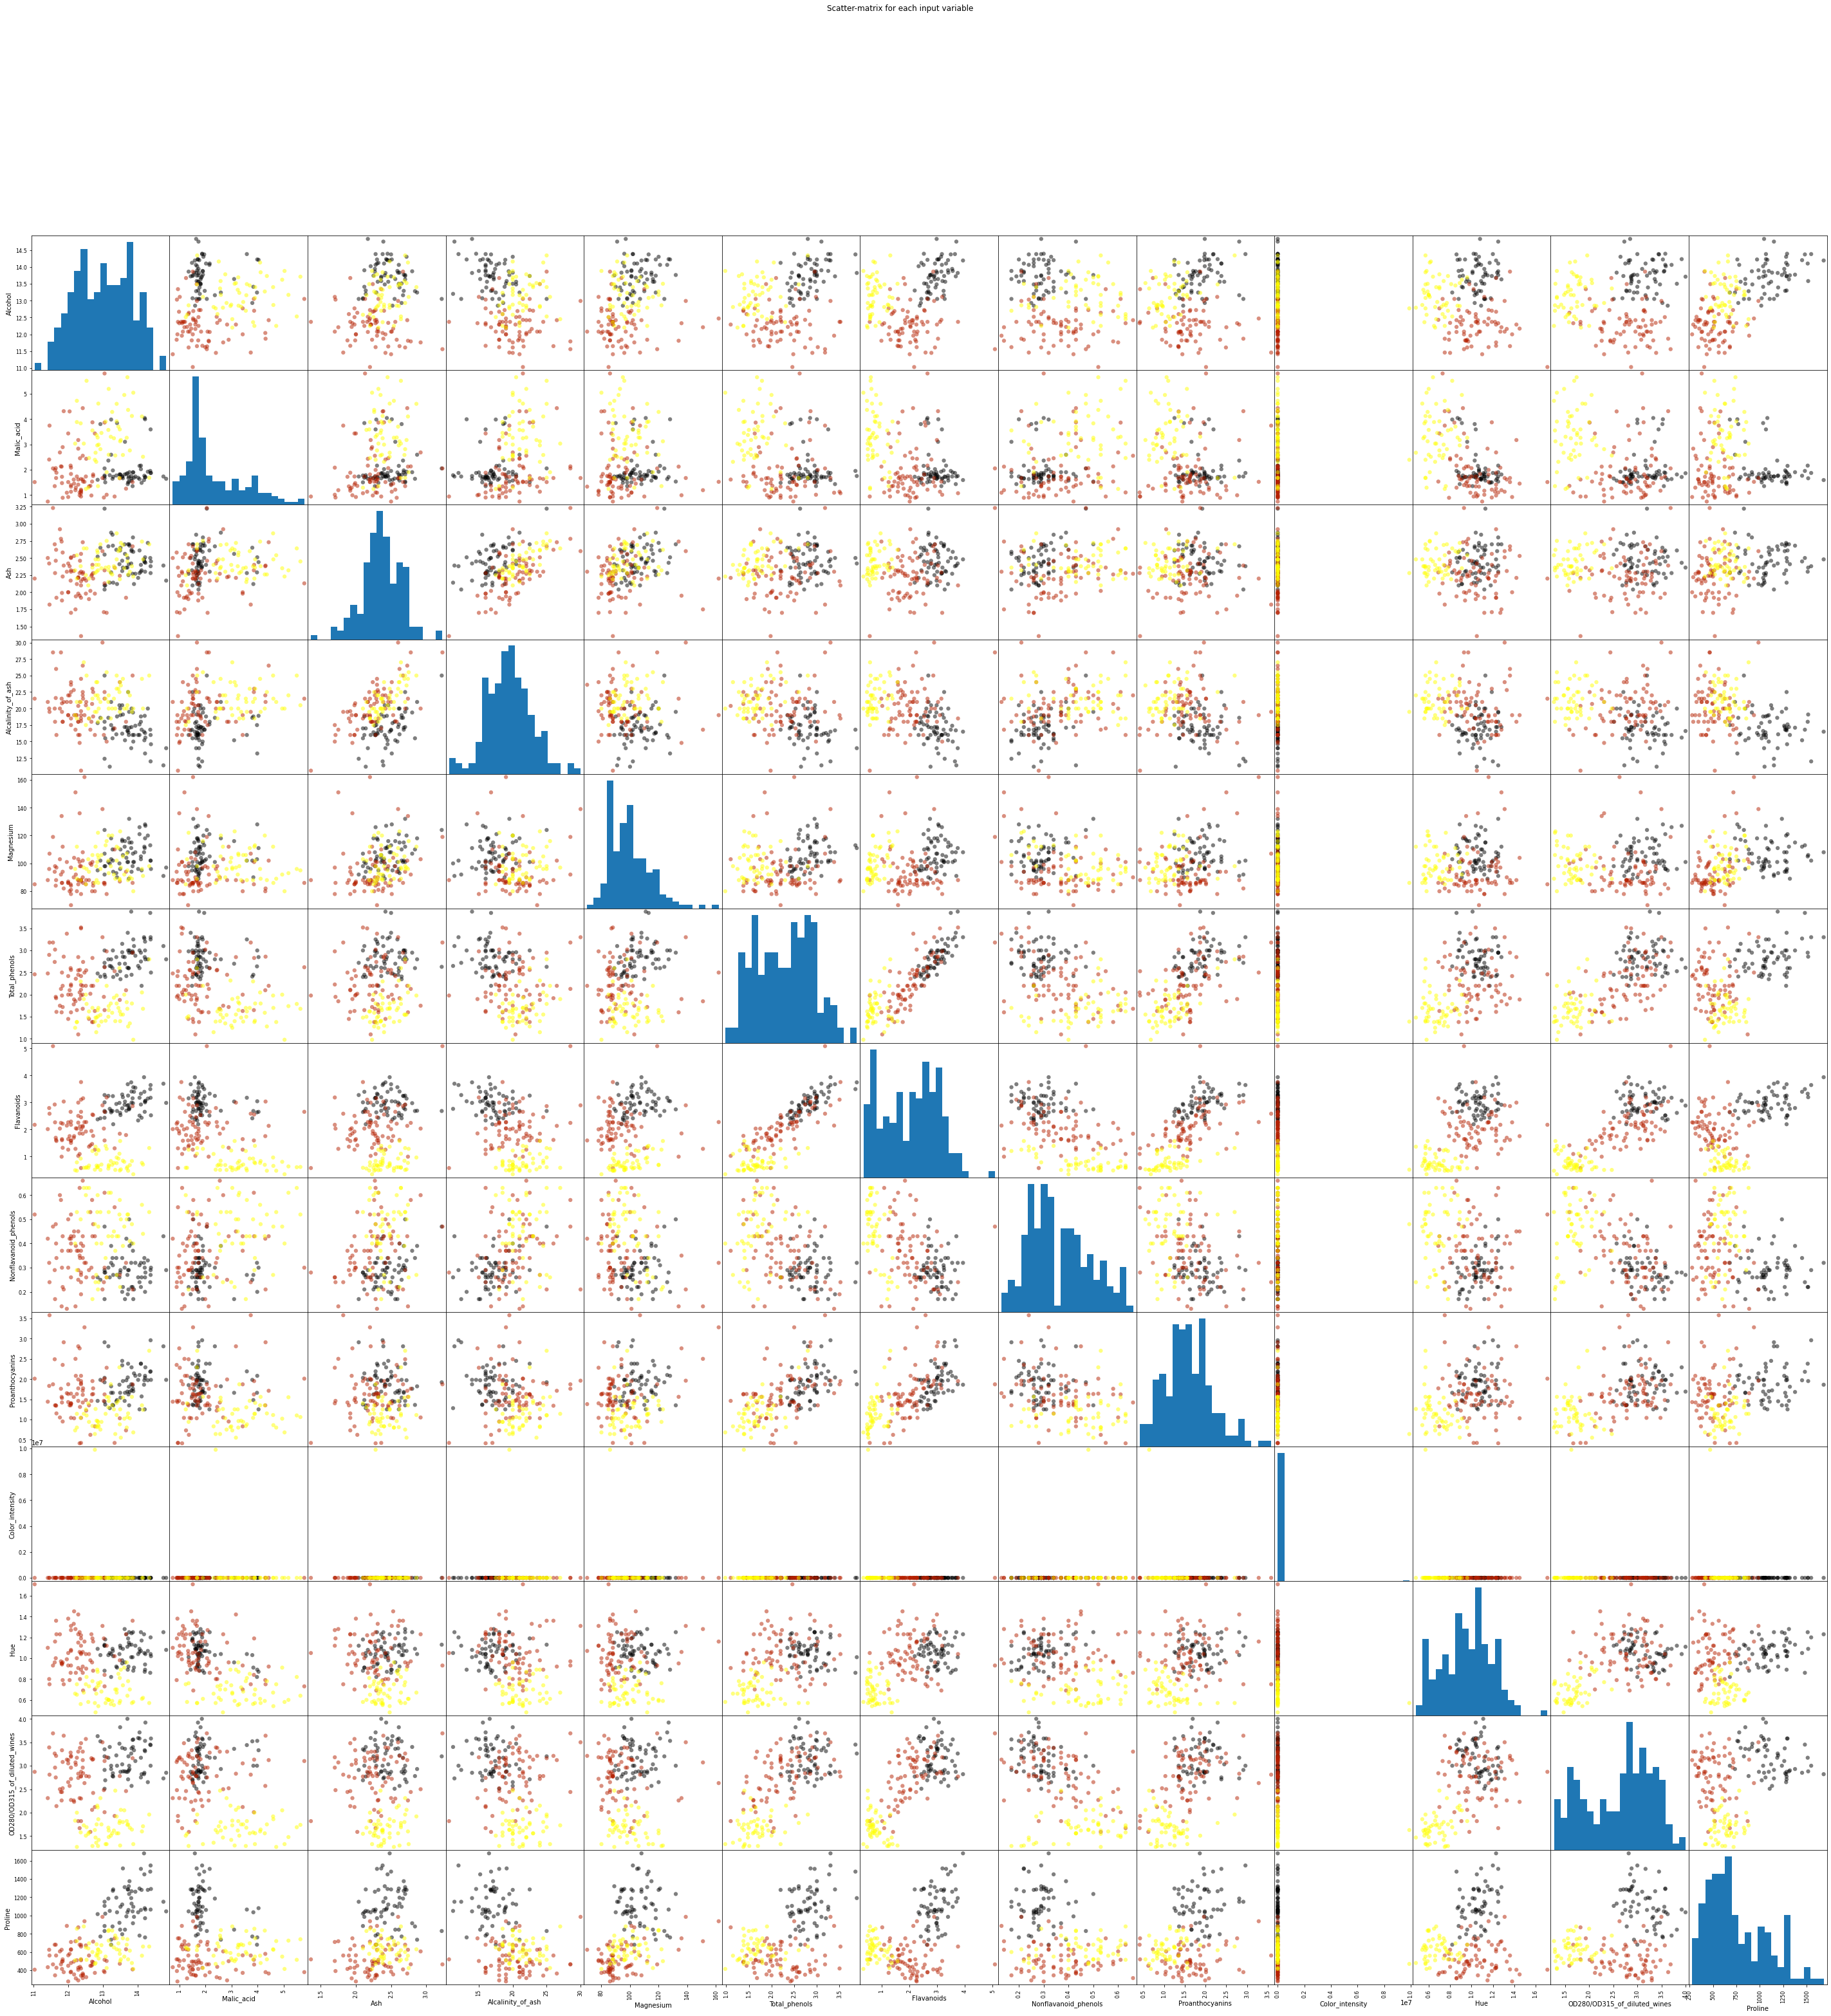

In [14]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':20}, figsize=(50,50), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('wine_scatter_matrix')

In [15]:
wine.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.562297e+04,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,7.420359e+05,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000e+00,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000e+00,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000e+00,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000e+00,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,9.899999e+06,1.710000,4.000000,1680.000000


# Firefly Algorithm

In [22]:
import numpy
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold,cross_val_score
        
def alpha_new(alpha, NGen):
    #% alpha_n=alpha_0(1-delta)^NGen=10^(-4);
    #% alpha_0=0.9
    delta = 1 - (10 ** (-4) / 0.9) ** (1 / NGen)
    alpha = (1 - delta) * alpha
    return alpha


def FFA(X_train,X_test,y_train,y_test, lb, ub, dim, n, MaxGeneration):

    # General parameters

    # n=50 #number of fireflies
    # dim=30 #dim
    # lb=-50
    # ub=50
    # MaxGeneration=10

    # FFA parameters
    alpha = 0.5  # Randomness 0--1 (highly random)
    betamin = 0.20  # minimum value of beta
    gamma = 1  # Absorption coefficient
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    zn = numpy.ones(n)
    zn.fill(float("inf"))

    #ns(i,:)=Lb+(Ub-Lb).*rand(1,d);
    ns = numpy.zeros((n, dim))
    for i in range(dim):
        ns[:, i] = numpy.random.uniform(0, 1, n) * (ub[i] - lb[i]) + lb[i]
    Lightn = numpy.ones(n)
    Lightn.fill(float("inf"))

    #[ns,Lightn]=init_ffa(n,d,Lb,Ub,u0)
    
    convergence = []
    iterations = []
    accuracy = []
    array = []
    
    # Main loop
    t = 0 
    while t < MaxGeneration:
        for k in range(0, MaxGeneration):  #start iterations

            #This line of reducing alpha is optional
            alpha = alpha_new(alpha, MaxGeneration)
        
            kmeans = KMeans(n_clusters = i).fit(X_train,y_train)
            cv = KFold(n_splits = 10, shuffle = True, random_state = 15)
            cv_accuracies = cross_val_score(kmeans,  X_test, y_test, cv = cv,scoring = 'accuracy')


            accuracies = cv_accuracies.mean()            
            fitness_value = (1 - accuracies) * 100
            
            
            #Evaluate new solutions (for all n fireflies)
            for i in range(0, n):
                zn[i] = kmeans.predict(ns[i, :].reshape(1,-1))
                Lightn[i] = zn[i]

            #Ranking fireflies by their light intensity/objectives

            Lightn = numpy.sort(zn)
            Index = numpy.argsort(zn)
            ns = ns[Index, :]

            #Find the current best
            nso = ns
            Lighto = Lightn
            nbest = ns[0, :]
            Lightbest = Lightn[0]

            #% For output only
            fbest = Lightbest
            convergence.append(fbest)
            array.append((100-fbest)/100)

            #Move all fireflies to the better locations
            #  [ns]=ffa_move(n,d,ns,Lightn,nso,Lighto,nbest,...
            #    Lightbest,alpha,betamin,gamma,Lb,Ub);
            scale = []
            for b in range(dim):
                scale.append(abs(ub[b] - lb[b]))
            scale = numpy.array(scale)
            for i in range(0, n):
                #The attractiveness parameter beta=exp(-gamma*r)
                for j in range(0, n):
                    r = numpy.sqrt(numpy.sum((ns[i, :] - ns[j, :]) ** 2))
                    #r=1
                    #Update moves
                    if Lightn[i] > Lighto[j]:  #Brighter and more attractive
                        beta0 = 1
                        beta = (beta0 - betamin) * math.exp(-gamma * r ** 2) + betamin
                        tmpf = alpha * (numpy.random.rand(dim) - 0.5) * scale
                        ns[i, :] = ns[i, :] * (1 - beta) + nso[j, :] * beta + tmpf

        #ns=numpy.clip(ns, lb, ub)
        t = t + 1
        iterations.append(t)
        accuracy.append((100-fbest)/100)
        

        IterationNumber = k
        BestQuality = fbest

        #if IterationNumber % 1 == 0:
        #print(["At iteration " + str(k) + " the best fitness is " + str(BestQuality)])
        #print('accuracy:',((100 - fbest) / 100))
        
        newArray = []
        newArray = array

        from sorting_techniques import pysort
        sortObj = pysort.Sorting()
        sortResult = sortObj.bubbleSort(newArray)

        print(sortResult) 
        
        if array[k] == sortResult[-1]:

            print("At iteration is: " + str(k+1) , "the best fitness is " + str(BestQuality))
            print('accuracy:',sortResult[-1])
            break 
        else:
            print(array[k], sortResult[-1])

    return IterationNumber,BestQuality,sortResult[-1]
    
    ####################### End main loop ##########################


# Kmeans

In [23]:
feature_names = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash','Magnesium',
                'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                 'Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
X = wine[feature_names]
y = wine['class']

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.5, random_state = 0)

In [26]:
IterationNumber,BestQuality,accuracy = FFA(X_train,X_test,y_train,y_test,-50,50,13,50,10)

[0.71, 0.8, 0.89, 0.9, 0.91, 0.91, 0.94, 0.97, 1.0, 1.0]
At iteration is: 10 the best fitness is 9.0
accuracy: 1.0


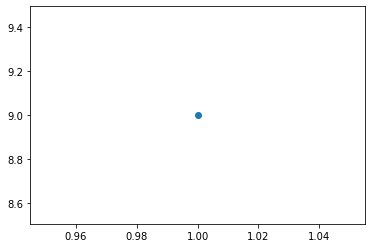

In [27]:
import matplotlib.pyplot as plt
plt.scatter(accuracy,BestQuality)

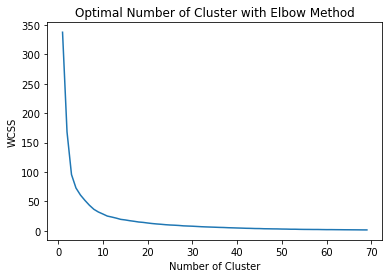

In [28]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

X = wine.iloc[:,[1,2]].values
from sklearn.cluster import KMeans
wcss = []
number_of_cluster_list = range(1, 70)
for i in number_of_cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 50, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(number_of_cluster_list, wcss)
plt.title('Optimal Number of Cluster with Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [29]:
#n_cluster = 10
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print([y_kmeans])

[array([6, 1, 7, 6, 7, 6, 6, 6, 6, 1, 6, 6, 1, 6, 6, 1, 6, 1, 6, 7, 6, 9,
       1, 3, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 9, 6, 9,
       1, 5, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 3, 2, 3, 9, 3, 3, 3, 9, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 2, 0, 3, 0, 3, 3, 2, 0, 3, 2, 0, 3, 2, 3, 3, 3, 0,
       8, 2, 2, 3, 3, 0, 0, 3, 9, 8, 0, 0, 8, 4, 8, 0, 3, 0, 3, 8, 3, 7,
       2, 9, 3, 2, 8, 4, 9, 2, 7, 7, 7, 4, 8, 9, 4, 4, 7, 9, 7, 2, 1, 7,
       3, 4, 5, 2, 6, 1, 8, 7, 9, 9, 7, 5, 9, 9, 7, 4, 2, 2, 6, 4, 9, 9,
       7, 5])]


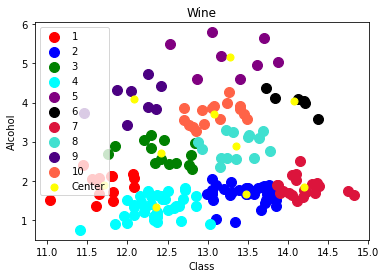

In [30]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = '4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = '5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = '6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'crimson', label = '7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'turquoise', label = '8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'indigo', label = '9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = 'tomato', label = '10')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Center')
plt.title('Wine')
plt.xlabel('Class')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters = i).fit(X_train,y_train)
y_pred = kmeans.predict(X_train)

In [32]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 30)
accuracies = cross_val_score(kmeans, X , y , cv = cv)
accuracy_mean = accuracies.mean()
print(accuracy_mean)
accuracy_std = accuracies.std() * 100
print(accuracy_std)

-0.8949638295209758
34.93353521234317


In [33]:
from sklearn.metrics import confusion_matrix
error_matrix = confusion_matrix(y_train, y_pred)
print(error_matrix)

[[0 0 0 ... 0 0 0]
 [1 0 4 ... 0 1 1]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
